In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

pd.set_option('display.max_columns',100)

In [118]:
X_train = pd.read_csv('MechanismOfAction/train_features.csv')
y_train = pd.read_csv('MechanismOfAction/train_targets_scored.csv')

In [119]:
X_train

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,...,c-50,c-51,c-52,c-53,c-54,c-55,c-56,c-57,c-58,c-59,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,-0.0347,-0.2566,-1.1980,0.3116,-1.0330,0.2208,...,0.7180,0.0546,-0.9013,0.0471,0.3927,-0.1148,-0.0476,-0.1612,0.1493,-0.2094,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,0.1194,-0.3958,-1.1730,0.4509,1.9250,1.1010,...,0.0453,0.5036,1.0750,0.2111,0.4759,0.1408,0.8763,0.4611,0.8784,-0.4291,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,0.3477,-0.5561,0.0357,-0.3636,-0.4653,-0.8346,...,-0.3569,-0.8229,-0.2778,0.7047,-0.9726,-0.0553,-0.2143,0.0187,0.4497,0.2585,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,-0.7229,-0.0010,0.1353,-1.6400,-0.7483,-1.0820,...,-2.8880,-1.4910,-1.7960,-1.3670,-2.7830,-3.3290,0.1071,-2.5430,0.3747,-1.7540,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,0.1302,0.1224,0.9584,0.2126,0.6162,1.1570,...,0.3559,0.0204,0.3385,-0.2290,-0.3813,-0.0856,1.1080,-0.4190,0.8741,0.9074,-0.2274,0.3215,0.1535,-0.4640

In [120]:
y_train

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_antifolate,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,...,potassium_channel_antagonist,ppar_receptor_agonist,ppar_receptor_antagonist,progesterone_receptor_agonist,progesterone_receptor_antagonist,prostaglandin_inhibitor,prostanoid_receptor_antagonist,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,

# How clean ist the data?

In [121]:
print(f'X_train no NaNs: {all( (~X_train.isna()))}')
print(f'y_train no NaNs: {all( (~y_train.isna()))}')

X_train no NaNs: True
y_train no NaNs: True


In [122]:
[X_train.dtypes.index[i] for i in range(len(X_train.dtypes)) if X_train.dtypes[i]!='float64']

['sig_id', 'cp_type', 'cp_time', 'cp_dose']

In [123]:
X_train.dtypes

sig_id      object
cp_type     object
cp_time      int64
cp_dose     object
g-0        float64
            ...   
c-95       float64
c-96       float64
c-97       float64
c-98       float64
c-99       float64
Length: 876, dtype: object

There are no missing values in the data. The only columns which are not float are the 4 at the beginning: sig_id, cp_type, cp_time, cp_dose.

In [124]:
# How many times was each compound measured?
X_train.sig_id.value_counts().value_counts()

1    23814
Name: sig_id, dtype: int64

In [125]:
# Are there any other types measured than ctl_vehicle (control = no compound) and trt_cp (sample with compound)
X_train.cp_type.value_counts()

trt_cp         21948
ctl_vehicle     1866
Name: cp_type, dtype: int64

In [126]:
# How many compound concentrations were used? 
X_train.cp_dose.value_counts()

D1    12147
D2    11667
Name: cp_dose, dtype: int64

# Distribution of values
## Gene expression data

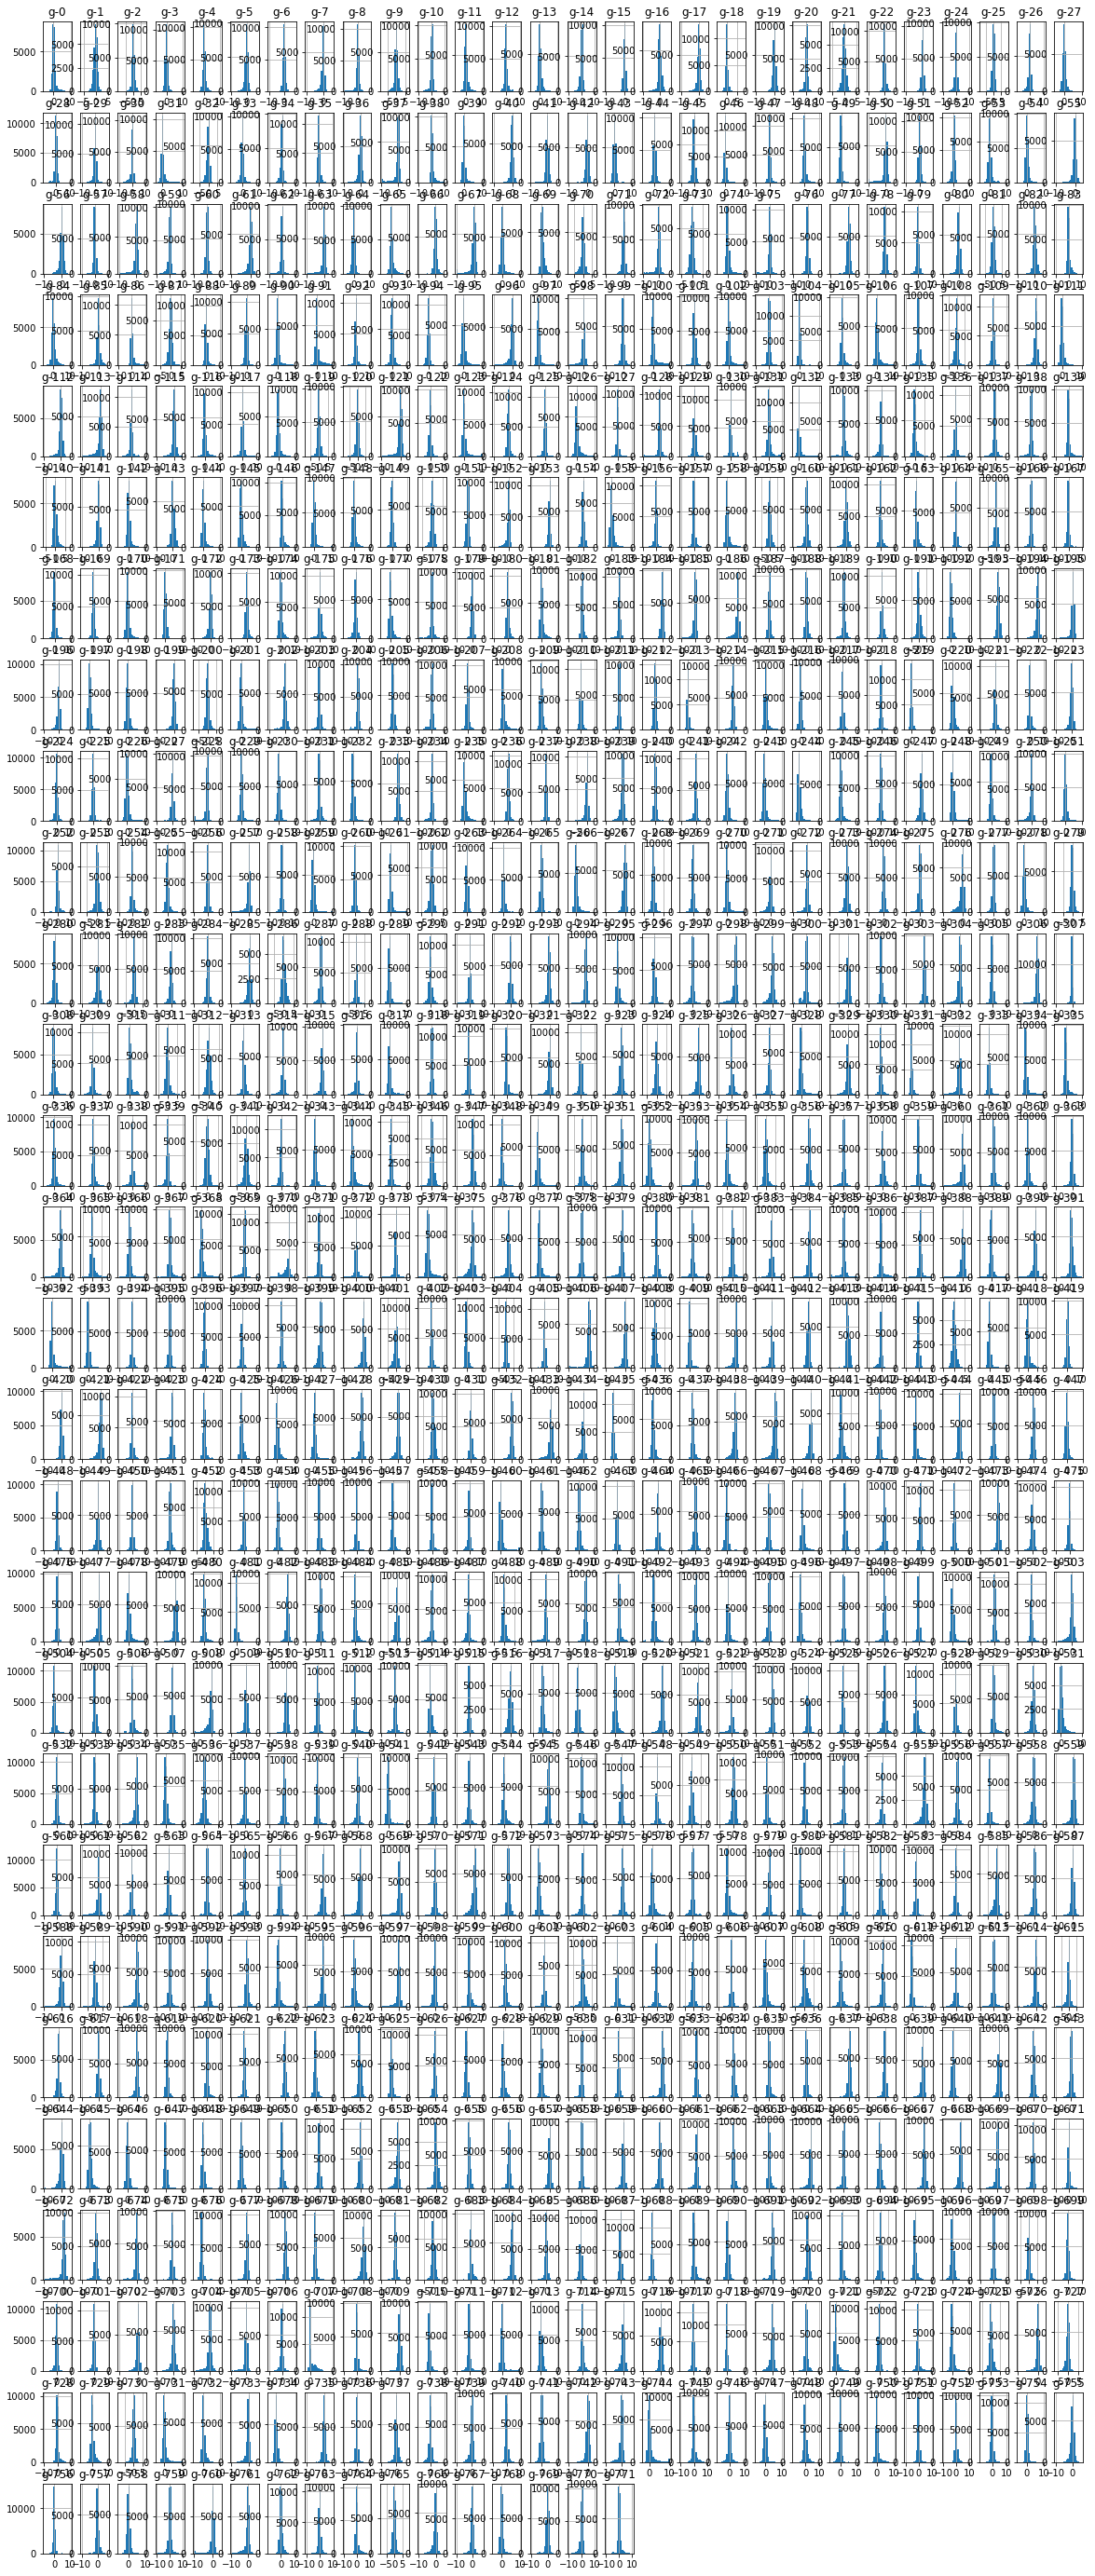

In [127]:
X_train[[f'g-{num}' for num in range(772)]].hist(bins=20, figsize=(20,50))
plt.show()

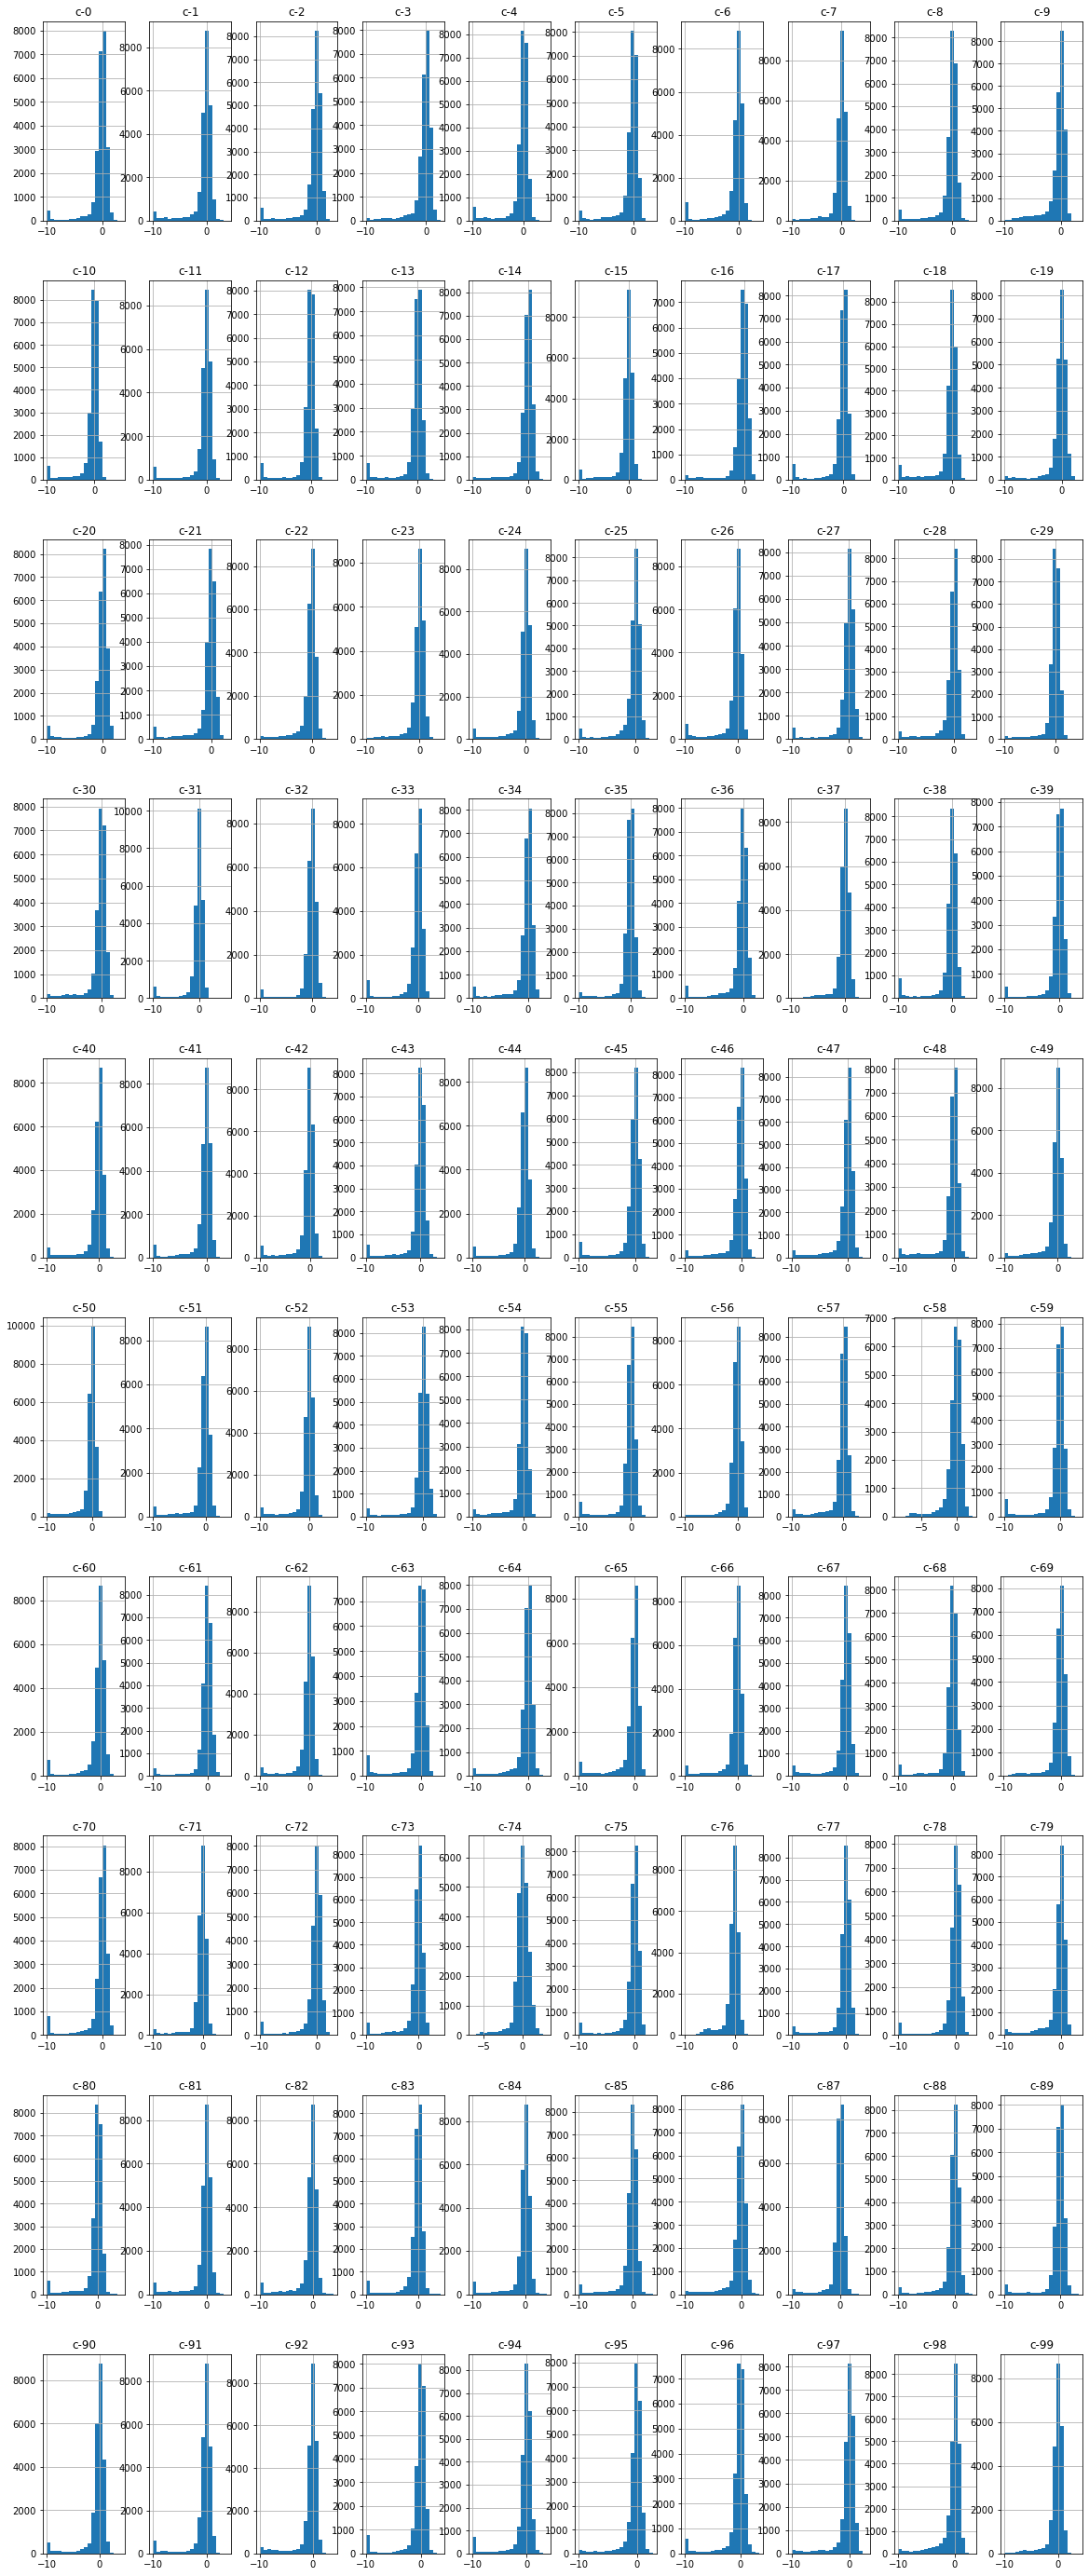

In [128]:
X_train[[f'c-{num}' for num in range(100)]].hist(bins=20, figsize=(20,50))
plt.show()

# Checking for Correlations between features

So far, I examined all the data I had for training my model. After this general exploration, I'm making sure to split the data I have in the training and testing sets I will use later to build and evaluate the model. More detailed analysis will be done on the training set only.

In [129]:
X_train, _, y_train, _ = train_test_split(X_train, y_train, 
                                                    test_size=0.2, 
                                                    random_state=174)

In [130]:
pearson = pd.DataFrame(columns=X_train.columns[4:], index=X_train.columns[4:])
high_corr = [['col_1', 'col_2', 'correlation', 'p-value']]

for col_1 in X_train.columns[4:]:
    for col_2 in X_train.columns[4:]:
        corr = pearsonr(X_train[col_1], X_train[col_2])
        pearson.loc[col_1,col_2],_ = corr
        if col_1!=col_2 and abs(corr[0])>0.9:
            high_corr.append([col_1, col_2, corr[0], corr[1]])

high_corr = pd.DataFrame(high_corr[1:], columns=high_corr[0])


In [131]:
high_corr = high_corr[high_corr['correlation']>0.9].col_1.value_counts()
high_corr

c-42    26
c-13    15
c-4     15
c-94    13
c-2     13
c-31    13
c-52    11
c-38    10
c-55    10
c-11     7
c-33     7
c-6      7
c-26     6
c-82     6
c-40     6
c-60     5
c-90     5
c-96     5
c-66     4
c-51     4
c-10     4
c-62     3
c-63     3
c-73     3
c-54     2
c-8      2
c-85     2
c-83     2
c-81     2
c-75     2
c-17     2
c-18     2
g-50     1
c-84     1
c-93     1
c-1      1
g-37     1
Name: col_1, dtype: int64

Features c-42, c-4, c-13, c-94, c-2, c-31 are highly correlated with many other features and will be removed from the analysis to reduce computational effort.

# Understand controls

In [133]:
X_train[X_train.cp_type=='ctl_vehicle'].cp_time.value_counts()

48    513
72    489
24    483
Name: cp_time, dtype: int64

In [135]:
X_train[X_train.cp_type=='ctl_vehicle'].cp_dose.value_counts()

D1    759
D2    726
Name: cp_dose, dtype: int64

In [136]:
X_train[(X_train.cp_type=='ctl_vehicle') & (X_train.cp_time==24) & (X_train.cp_dose=='D1')].describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,...,c-50,c-51,c-52,c-53,c-54,c-55,c-56,c-57,c-58,c-59,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,240.0,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,24.0,-0.238675,-0.456308,0.276065,0.016845,-0.472225,0.075085,0.235052,-0.088164,0.356843,0.480250,0.113550,-0.372023,0.413808,0.009578,-0.084912,-0.032615,0.308680,0.214397,-0.019414,-0.245647,0.188144,-0.165474,-0.299030,0.202012,0.078137,0.254840,0.448654,-0.505897,0.211192,-0.066173,0.185356,0.155199,-0.124683,0.473458,-0.441538,0.161618,-0.108067,0.268343,-0.367591,-0.409733,0.430558,0.362129,-0.299349,0.111953,0.522920,0.209612,-0.105377,-0.220396,-0.008809,...,0.299428,0.457645,0.222276,0.302595,0.331703,0.339533,0.322175,0.255299,0.044591,0.301604,0.356676,0.148092,0.057773,0.134992,0.237785,0.220215,0.155812,0.309506,0.325300,0.268253,0.275844,0.255434,0.450533,0.666237,0.205338,0.287738,0.263349,0.183418,0.284655,0.324535,0.230592,0.386896,0.248043,0.134345,0.459672,0.254407,0.410443,0.194786,0.182927,0.149738,0.256012,0.272662,0.135090,0.434337,0.419950,0.319716,0.331606,0.287372,0.319414,0.351218
std,0.0,0.771699,0.869570,1.068002,0.715977,1.046325,1.226858,0.987731,1.085359,0.683338,1.083156,0.743536,0.755496,1.028238,0.795681,0.735513,0.724516,0.921297,0.878288,0.565149,0.901372,0.748442,0.770933,0.706808,0.806716,0.937895,0.654639,0.785697,0.895476,0.694332,0.888755,0.636080,1.008184,0.822785,0.819515,0.904513,0.821777,0.910990,0.670122,0.997231,0.744083,0.909895,0.849524,0.989884,0.799023,1.097019,0.904816,0.409295,0.744814,0.688018,...,0.621727,0.663492,0.732897,0.681404,0.640910,0.689032,0.673890,0.655620,0.656716,0.639745,0.747585,0.672658,0.776150,0.689740,0.605350,0.633015,0.663409,0.608997,0.662327,0.647434,0.692913,0.670804,0.713802,0.685597,0.673142,0.699410,0.709798,0.609227,0.692414,0.643326,0.650282,0.644552,0.705947,0.687110,0.682043,0.753306,0.670370,0.689629,0.710459,0.646332,0.676199,0.640100,0.629709,0.634981,0.685825,0.659391,0.672512,0.674018,0.565128,0.727079
min,24.0,-2.370000,-3.341000,-1.471000,-1.984000,-3.633000,-10.000000,-4.981000,-3.451000,-1.314000,-2.425000,-2.078000,-3.006000,-2.617000,-2.326000,-2.000000,-2.275000,-2.675000,-4.842000,-1.796000,-3.620000,-2.111000,-2.232000,-3.453000,-1.773000,-3.209000,-1.922000,-2.851000,-2.507000,-1.667000,-2.194000,-1.536000,-2.956000,-4.713000,-1.711000,-4.217000,-2.439000,-4.814000,-1.815000,-3.320000,-2.806000,-3.077000,-2.334000,-3.524000,-2.170000,-1.549000,-2.032000,-1.700000,-4.675000,-1.940000,...,-1.767000,-1.348000,-1.949000,-1.463000,-1.509000,-1.266000,-1.

In [138]:
X_train[(X_train.cp_type=='ctl_vehicle') & (X_train.cp_time==24) & (X_train.cp_dose=='D2')].describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,...,c-50,c-51,c-52,c-53,c-54,c-55,c-56,c-57,c-58,c-59,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,...,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,24.0,0.016795,-0.210066,0.231739,0.128680,-0.470757,-0.225402,0.240933,-0.227815,0.536874,0.353129,0.409275,0.156913,0.730162,0.190452,0.130891,-0.231819,0.282590,0.259946,-0.027228,-0.350561,0.162719,-0.732084,-0.105149,-0.081774,-0.113715,0.169630,0.484913,-0.312229,0.640825,-0.084815,0.063304,0.229051,-0.454869,0.349653,-0.306968,0.296887,0.161148,0.198765,0.243042,-0.648707,0.169980,0.342418,-0.682941,0.244076,0.329035,-0.477873,0.020675,0.157805,0.070886,...,-0.019123,0.203314,-0.118080,0.142791,0.126230,0.016852,0.131191,0.136061,0.042081,0.033309,0.181443,-0.046806,-0.151419,-0.134470,-0.046643,0.074104,-0.036447,0.051543,0.095674,0.015991,-0.025453,-0.037528,0.093985,0.278483,0.059549,0.020520,0.003556,0.037277,0.039917,0.085107,0.011586,0.090064,0.015888,-0.000200,0.195065,-0.009853,0.098150,-0.020329,-0.054362,-0.019605,0.049418,-0.109008,-0.133793,0.124348,0.103446,0.154934,0.081670,0.015028,0.137984,0.122836
std,0.0,0.817047,0.993626,0.848050,1.148358,1.217623,1.076706,0.894336,1.026260,0.791772,0.990985,1.202788,0.955376,1.367381,0.783636,0.848849,0.559444,1.203561,0.959715,0.601973,0.993522,0.896449,1.187906,0.509393,0.625660,1.092964,0.627915,0.951174,0.987685,0.777604,0.765751,0.839572,0.989435,0.949743,0.898490,0.722284,0.886970,1.295878,0.699197,1.041272,0.750781,0.809415,0.802422,1.148289,0.936893,0.951073,1.195581,0.636484,0.735504,0.820921,...,0.678930,0.650127,0.743702,0.730502,0.722087,0.708069,0.690060,0.658784,0.642301,0.723625,0.701251,0.728603,0.709514,0.703732,0.667813,0.594263,0.693706,0.683900,0.667493,0.661465,0.675070,0.684355,0.763140,0.698874,0.628668,0.654416,0.716625,0.668901,0.727300,0.654674,0.696004,0.740246,0.710491,0.688749,0.732078,0.678454,0.653295,0.710857,0.688621,0.735009,0.658148,0.715463,0.715937,0.683343,0.758973,0.642254,0.694398,0.719866,0.612708,0.683089
min,24.0,-1.959000,-2.597000,-1.372000,-2.020000,-2.871000,-5.094000,-4.462000,-2.207000,-4.064000,-4.387000,-1.823000,-1.850000,-1.518000,-1.774000,-2.818000,-2.175000,-5.076000,-4.835000,-1.873000,-10.000000,-5.576000,-4.581000,-1.667000,-1.793000,-2.517000,-1.421000,-2.366000,-4.406000,-1.512000,-2.016000,-2.101000,-1.890000,-2.474000,-1.828000,-2.434000,-2.653000,-10.000000,-1.366000,-2.188000,-2.767000,-4.326000,-2.071000,-3.287000,-1.799000,-2.026000,-4.057000,-1.665000,-2.153000,-1.960000,...,-2.043000,-2.039000,-3.127000,-1.918000,-1.722000,

In [140]:
X_train.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,...,c-50,c-51,c-52,c-53,c-54,c-55,c-56,c-57,c-58,c-59,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,...,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.00000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000
mean,48.057950,0.250433,-0.094599,0.152637,0.081063,0.056387,-0.145430,0.035557,-0.202172,-0.196565,0.126141,-0.117006,0.184242,0.147884,0.209260,-0.173970,-0.021681,0.125792,-0.145556,0.087744,-0.083298,-0.113584,-0.084247,0.047519,-0.116654,-0.111754,-0.051399,-0.088817,0.118692,-0.048887,-0.081390,-0.199683,0.377656,-0.188831,0.079340,-0.087853,0.139070,-0.185514,-0.602525,0.536485,0.134854,-0.191083,-0.120595,-0.128393,0.039517,-0.000381,-0.138039,0.194707,0.052596,0.186831,...,-0.390738,-0.452908,-0.460206,-0.367872,-0.412868,-0.486407,-0.281661,-0.457286,-0.301130,-0.544025,-0.519450,-0.358717,-0.436396,-0.611437,-0.402133,-0.617098,-0.450974,-0.499608,-0.412428,-0.275043,-0.547832,-0.356557,-0.441926,-0.470550,-0.008798,-0.464194,-0.274527,-0.453845,-0.408491,-0.449775,-0.469750,-0.506259,-0.490637,-0.448173,-0.462037,-0.410896,-0.331545,-0.299100,-0.325587,-0.401788,-0.468369,-0.45954,-0.510193,-0.496774,-0.504833,-0.349438,-0.462635,-0.375553,-0.473281,-0.304579
std,19.419134,1.398858,0.814817,1.036585,0.942422,1.040659,1.189963,0.883936,1.119384,1.756979,1.088531,1.283062,1.253792,1.239351,1.271659,1.251598,0.654871,1.416766,1.175837,0.737189,0.845208,1.228847,0.823464,0.928818,0.759399,1.196124,0.873791,1.101556,1.005874,1.028505,1.281184,1.302689,1.549987,0.925571,1.179774,1.169130,1.066759,1.398811,2.199847,2.002525,0.991425,1.262001,1.262690,1.010958,0.911006,0.996991,1.127209,1.127730,1.064055,1.379911,...,1.800515,1.965345,2.010473,1.753210,1.834284,2.126140,1.480190,1.908216,1.239442,2.163860,2.121656,1.712289,1.900939,2.308588,1.793221,2.225109,1.995401,2.072298,1.889975,1.456965,2.190615,1.735415,1.930324,2.020018,1.029271,2.004813,1.427796,1.924395,1.889166,1.833065,2.013459,2.102178,2.053111,1.996172,2.018106,1.885773,1.652637,1.642304,1.663803,1.836826,2.003807,2.03806,2.000619,2.111652,2.166252,1.631088,2.060515,1.701488,1.840166,1.412956
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.227000,-4.705000,-10.000000,-4.460000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-9.587000,-5.563000,-10.000000,-8.272000,-8.184000,-4.5

There is quite a bit of difference between control conditions, but also within. Checking wether there are also control conditions in the test data set (the official test)

In [141]:
to_predict = pd.read_csv('MechanismOfAction/test_features.csv')
to_predict

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,...,c-50,c-51,c-52,c-53,c-54,c-55,c-56,c-57,c-58,c-59,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,24,D1,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,-0.2140,0.2221,-0.3260,1.9390,-0.2305,-0.3670,1.3040,1.4610,0.0043,0.6816,-0.2304,-0.0635,-0.2030,-0.6821,-0.6242,0.1297,-0.0338,0.3372,0.2254,0.4795,0.7642,0.6638,-0.2480,-0.1183,-0.4847,-0.0179,-0.8204,-0.5296,-1.5070,-0.0144,0.4448,0.5753,-0.2993,-0.9532,-0.1443,-1.0880,0.2080,0.5670,1.1190,-0.0455,...,-0.3456,-0.6688,0.6439,-1.0650,1.0980,0.0339,-1.3410,-0.2861,0.3991,0.8242,-0.1353,0.0494,0.8939,0.2270,0.2876,-0.3065,0.6519,-0.8156,-1.4960,0.3796,0.0877,-1.0230,-0.0206,-0.4149,-0.6258,-0.2688,0.4403,-0.4900,0.2910,0.0473,-0.0914,0.3087,-0.0612,-0.9128,-0.9399,0.0173,0.0519,-0.0035,-0.5184,-0.3485,0.0981,0.7978,-0.1430,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750
1,id_001897cda,trt_cp,72,D1,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,-1.8820,0.4022,-0.3528,0.1271,0.9303,0.3173,-1.0120,-0.3213,0.0607,-0.5389,-0.8030,-1.0600,-0.0978,-0.8156,-0.6514,0.6812,0.5246,0.0000,0.5030,-0.1500,-0.1433,2.0910,-0.6556,-0.6012,-0.4104,-0.0580,-0.3608,0.2197,-0.7101,1.3430,-0.9605,-1.1920,0.3733,0.0216,-0.1787,-0.4277,1.2110,0.1401,-1.0940,0.7750,...,-0.1131,0.3044,-1.1590,0.9873,-0.6498,-0.5486,-0.4455,-2.0530,-1.3190,-1.5640,-0.7458,0.0458,-0.3644,-1.8180,-0.0358,-0.7925,-0.2693,-0.0938,-0.1833,-0.7402,-1.4090,0.1987,0.0460,-1.3520,-0.3445,-0.0909,-0.6337,-0.5788,-0.7885,0.0996,-1.9480,-1.2720,-0.7223,-0.5838,-1.3620,-0.7671,0.4881,0.5913,-0.4333,0.1234,-0.1190,-0.1852,-1.0310,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300
2,id_002429b5b,ctl_vehicle,24,D1,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,-0.3390,-0.3206,0.6944,0.5837,-0.0553,-0.6222,2.5430,-0.7857,0.8163,-0.0495,0.1806,1.0290,-0.5204,-1.1070,0.7365,-0.3835,-0.5771,0.0523,-0.2690,0.1674,0.6010,-0.6660,0.0276,0.0924,0.2785,-0.3943,-0.4602,-0.0673,-1.3420,0.3127,0.3317,0.5176,-1.0830,-0.7108,0.8037,-0.1761,-0.5053,-0.1759,-0.1807,-0.2681,...,-0.7448,0.9871,0.3960,0.4733,0.4046,0.3164,0.1685,0.0765,-0.0993,1.2990,0.4369,-1.4960,1.2390,-1.2220,0.6624,-0.7336,-0.5248,0.0727,0.1455,0.5364,-0.0823,0.5734,0.4876,0.7088,1.0750,0.4689,1.0870,-0.5036,-0.3451,0.5087,1.1100,0.7886,0.2093,-0.4617,1.4870,0.1985,1.1750,-0.5693,0.5062,-0.1925,-0.2261,0.3370,-1.3840,0.8604,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942
3,id_00276f245,trt_cp,24,D2,0.4828,0.1955,0.3825,0.4244,-0.5855,-1.2020,0.5998,-0.1799,0.9365,0.2942,1.3990,-1.1080,1.1610,-0.8134,0.0743,-0.3096,-0.9956,1.7100,1.2200,-0.1258,-0.5900,-0.7956,-0.6765,0.0000,-0.8820,0.7609,-0.0882,0.5217,0.9587,-0.4764,0.2690,0.4753,0.0196,0.2775,-0.7142,0.7079,0.4006,-0.0175,0.5904,-0.1295,-0.1021,-0.0480,-0.7627,-0.3995,0.2503,-1.9450,...,-0.5233,-0.4373,-0.1274,0.3956,-0.9533,0.0019,1.0510,-0.4933,-0.2838,-0.3088,-1.2190,-0.5564,-0.2831,0.5902,-0.2881,-0.0013,-0.4036,-0.4076,-0.5593,-0.5505,-0.4806,-0.0846,0.5884,0.2310,0.3956,0.6495,-0.2511,-0.2207,0.1274,-0.5378,0.5649,-0.1231,0.1586,-0.4260,-0.6815,-0.4753,0.2611,-1.1780,0.1909,-1.2320,0.1260,0.1570,-0.1784,-1.1200,-0.4325,-0.9005,0.8131,-0.1305,0.5645,-0.5809
4,id_0027f1083,trt_cp,48,D1,-0.3979,-1.2680,1.9130,0.2057,-0.5864,-0.0166,0.5128,0.6365,0.2611,-1.1120,-0.1747,-0.2053,-0.0006,0.0254,0.1784,-0.1314,1.0700,0.0477,-0.0756,0.1287,0.1403,0.7609,-0.1095,0.0000,-1.0950,-0.0780,0.9048,-0.3007,0.4351,-0.1558,0.2101,0.4850,0.1139,0.6745,-0.9101,-0.6690,1.6320,-0.0910,-0.2841,-0.0883,1.7570,2.0050,-0.8237,0.3234,0.2379,-1.4110,...,-0.6099,0.8427,0.8932,1.1800,0.3889,1.0560,1.1240,0.1985,1.3510,0.5485,0.6412,

There are several control conditions also in the final test data. So, the controls are not supposed to be used for normalization but rather as an internal control that they should not be predicted as bioactive. 

In [171]:
# checking if controls are indeed not supposed to be picked up as bioactive with a random control
y_train[y_train.sig_id=='id_4e0a6c1cc'].sum().values[1:].sum()

0

Controls will be handled just like the other compounds. But the cp_type column should be deleted as this would be the best indicator for "not bioacitve".

In [173]:
drugs = pd.read_csv('MechanismOfAction/train_drug.csv')
drugs.drug_id.value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
32dccc366       1
f19d8c43b       1
c0521523c       1
67c4672f3       1
dd4a96d16       1
Name: drug_id, Length: 3289, dtype: int64